In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from functools import partial
import numdifftools as nd
from cosmoTransitions import pathDeformation as pd

In [82]:
class Potential:
    def __init__(self, a = 50., E = 0., epsilon = .1, nmax = 5):
        self.params = a, E, epsilon, nmax

    def V(self, X):
        x,y = X[...,0], X[...,1]
        a, E, epsilon, nmax = self.params
        somatory = sum([(1 - E - n*epsilon)*np.exp(-a*np.power(x - n, 2)) for n in np.arange(nmax)])
        return 1/np.power(y, 2) - np.exp(-a*np.power(y - 1, 2))*somatory

    def dV(self, X):
        x,y = X[...,0], X[...,1]
        a, E, epsilon, nmax = self.params
        somatory = sum([(1 - E - n*epsilon)*np.exp(-a*np.power(x - n, 2)) for n in np.arange(nmax)])
        dsomatory = sum([(1 - E - n*epsilon)*np.exp(-a*np.power(x - n, 2))*(-2*a*(x - n)) for n in np.arange(nmax)])
        dVdx = - np.exp(-a*np.power(y - 1, 2))*dsomatory
        dVdy = -2/np.power(y, 3) - np.exp(-a*np.power(y - 1, 2))*(-2*a*(y - 1))*somatory
        rval = np.empty_like(X)
        rval[...,0] = dVdx
        rval[...,1] = dVdy
        return rval

    def plotContour(self):
        nx = 100
        a, E, epsilon, nmax = self.params
        xmin, xmax, ymin, ymax = 0, nmax, 0.5, 3
        X = np.linspace(xmin, xmax,nx)[:,None] * np.ones((1,nx))
        Y = np.linspace(ymin, ymax,nx)[None,:] * np.ones((nx,1))
        XY = np.rollaxis(np.array([X,Y]), 0, 3)
        Z = self.V(XY)
        plt.contourf(X,Y,Z, np.round(np.linspace(np.min(Z), np.max(Z), 200), 2), cmap='RdGy')
        plt.colorbar()

In [85]:
def makePlots():
    plt.figure()
    m = Potential(epsilon = 0.01)
    m.plotContour()

    true, meta = [0.,1.], [4.,1.]
    iniradius = (meta[0] - true[0])/2
    inipath_x = np.linspace(true[0], meta[0])
    inipath_y =  true[1] + np.sqrt(-np.power(inipath_x - iniradius - true[0],2) + np.power(iniradius,2))
    inipath = np.array([inipath_x, inipath_y]).T
    Y = pd.fullTunneling(inipath, m.V, m.dV)
    plt.plot(Y.Phi[:,0], Y.Phi[:,1], 'k', lw=1.5)

    plt.show()

Deformation doesn't appear to be converging.Stopping at the point of best convergence.
Deformation doesn't appear to be converging.Stopping at the point of best convergence.
Deformation doesn't appear to be converging.Stopping at the point of best convergence.
Deformation doesn't appear to be converging.Stopping at the point of best convergence.
Path deformation converged. 1 steps. fRatio = 5.72777e-02


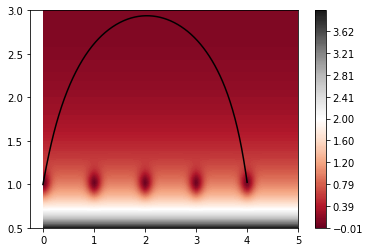

In [86]:
makePlots()